## Task1 :Prediction using Supervised ML 
## GRIP The Spark foundation
## Author-Ritvik Thondapati

Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.
You can use R, Python, SAS Enterprise Miner or any other tool
 


### Importing Required Libraries

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading Data

In [24]:
data='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(data) 

### Displaying the first five rows of the data

In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Number of (Rows,Columns) in the dataframe

In [12]:
df.shape

(25, 2)

### Checking Null Values in the dataset

In [17]:
df.isnull == True

False

### Column data types

In [18]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Checking for missing values

In [19]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Removing duplicate rows

In [20]:
df.drop_duplicates(inplace=True)

Now we will be checking whether any duplicates were there or not using df.shape

In [23]:
df.shape

(25, 2)

We did not have any duplicates

### Descriptive Statistical summary of the columns

In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This shows us the mean,std,min and max of the two columns

### Importing library for data visualization

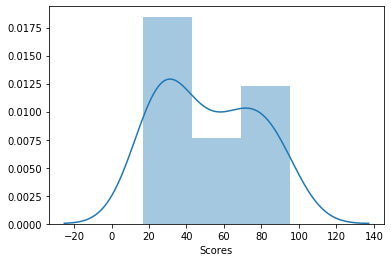

In [26]:
sns.distplot(df['Scores'])

This plot depicts that the scores from 16-40 are higher than 40-70 and 70-95

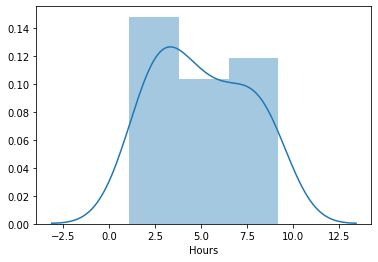

In [15]:
sns.distplot(df['Hours'])

This plot depicts that the hours from 1-4 are higher than 4.0-7.0 and 7.0-9.5

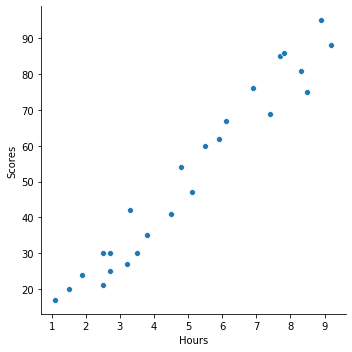

In [16]:
sns.relplot(x="Hours",y="Scores",data=df,kind="scatter")

This shows a positive relationship between hours and scores as it is uphill pattern

### Separating the target variable from the predictor variable.

In [17]:
x_df=df.drop('Scores',axis=1)
y_df=df['Scores']

### Splitting the dataset into train and test data

In [19]:
trainX, testX, trainY, testY = train_test_split(x_df,y_df,test_size=0.2,random_state=100)

### Linear Regression

In [21]:
lreg=LinearRegression()

In [27]:
lreg.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Making prediction

In [28]:
preds=lreg.predict(testX) 
preds

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

### Estimating Training and Test Score

In [29]:
lreg.score(testX,testY) 

0.9050356232459791

In [31]:
lreg.score(trainX,trainY) 

0.9519568836485192

### Comparing Actual and Predicted Model 

In [30]:
results = pd.DataFrame({'Actual': testY, 'Predicted': preds})  
results

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


### Evaluation of Model

In [33]:
from sklearn import metrics
b0=metrics.mean_absolute_error(testY, preds)
print('Mean Absolute Error:',b0)

Mean Absolute Error: 4.140342096254413


In [34]:
c1=lreg.predict(np.array([9.25]).reshape(1, 1))
print(c1)

[92.96728365]


#### The predicted score if a student studies for 9.25 hours/day is 92.967